In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
loan_data = pd.read_csv('loan_data_2007_2014.csv')
loan_data = loan_data.iloc[:,1:]
loan_data.head()

C:\Users\darel\AppData\Local\Temp\ipykernel_7952\1588105585.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan_data_2007_2014.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Understanding

#### Tipe Data

In [3]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [4]:
loan_data.dtypes.value_counts()

float64    46
object     22
int64       6
dtype: int64

In [5]:
columns = loan_data.columns
count = 0

for column in columns:
    print(f"{count}. Type data of {column}: {loan_data[column].dtype}")
    count += 1

0. Type data of id: int64
1. Type data of member_id: int64
2. Type data of loan_amnt: int64
3. Type data of funded_amnt: int64
4. Type data of funded_amnt_inv: float64
5. Type data of term: object
6. Type data of int_rate: float64
7. Type data of installment: float64
8. Type data of grade: object
9. Type data of sub_grade: object
10. Type data of emp_title: object
11. Type data of emp_length: object
12. Type data of home_ownership: object
13. Type data of annual_inc: float64
14. Type data of verification_status: object
15. Type data of issue_d: object
16. Type data of loan_status: object
17. Type data of pymnt_plan: object
18. Type data of url: object
19. Type data of desc: object
20. Type data of purpose: object
21. Type data of title: object
22. Type data of zip_code: object
23. Type data of addr_state: object
24. Type data of dti: float64
25. Type data of delinq_2yrs: float64
26. Type data of earliest_cr_line: object
27. Type data of inq_last_6mths: float64
28. Type data of mths_sin

In [6]:
# Melihat nilai dari kolom desc

loan_data["desc"].unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       '  Borrower added on 12/09/13 > consolidate all credit accounts<br>',
       '  Borrower added on 12/06/13 > I am going to consolidate a credit card debt from medical and moving expenses with a loan I already have. I have paid everything on time for years, I just need to eliminate this

In [7]:
loan_data.shape

(466285, 74)

In [8]:
loan_data.describe(include=["O"])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,...,466285,466265,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,...,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,...,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


Terdapat kolom data yang merupakan gabungan dari beberapa tipe data

In [9]:
loan_data["initial_list_status"].unique()

array(['f', 'w'], dtype=object)

In [10]:
loan_data[["grade", "sub_grade"]]

,grade,sub_grade
0,B,B2
1,C,C4
2,C,C5
3,C,C1
4,B,B5
...,...,...
466280,C,C2
466281,D,D5
466282,D,D1
466283,A,A4


In [11]:
grades = list(loan_data["grade"].unique())
sub_grades = list(loan_data["sub_grade"].unique())

print(f"Grade: {grades}")
print(f"Sub Grade: {sub_grades}")

Grade: ['B', 'C', 'A', 'E', 'F', 'D', 'G']
Sub Grade: ['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1', 'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3', 'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1', 'F5', 'G5']


In [12]:
loan_data[["id", "member_id"]].head()

,id,member_id
0,1077501,1296599
1,1077430,1314167
2,1077175,1313524
3,1076863,1277178
4,1075358,1311748


In [13]:
cols = list(loan_data.columns)
cat_cols = list(loan_data.describe(include=["O"]).columns)
num_cols = [col for col in cols if col not in cat_cols]

print("Categorical columns:")
print(cat_cols,"\n")

print("Numeric columns:")
print(num_cols)

Categorical columns:
['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type'] 

Numeric columns:
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6

### Data Preprocessing

In [14]:
# Mengubah ID menjadi index dataframe

loan_data = loan_data.set_index("id", drop=True)
loan_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
preprocessed_loan = loan_data.drop(["member_id", "grade","emp_title", "issue_d", "verification_status", "pymnt_plan", "desc", "url", "purpose", "title", "zip_code", "addr_state", "earliest_cr_line", "initial_list_status", "last_pymnt_d", "next_pymnt_d", "last_credit_pull_d", "application_type"], axis=1)
preprocessed_loan.shape

(466285, 55)

In [16]:
preprocessed_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000,5000,4975.0,36 months,10.65,162.87,B2,10+ years,RENT,24000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077430,2500,2500,2500.0,60 months,15.27,59.83,C4,< 1 year,RENT,30000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077175,2400,2400,2400.0,36 months,15.96,84.33,C5,10+ years,RENT,12252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076863,10000,10000,10000.0,36 months,13.49,339.31,C1,10+ years,RENT,49200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075358,3000,3000,3000.0,60 months,12.69,67.79,B5,1 year,RENT,80000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
preprocessed_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 1077501 to 9199665
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   sub_grade                    466285 non-null  object 
 7   emp_length                   445277 non-null  object 
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466281 non-null  float64
 10  loan_status                  466285 non-null  object 
 11  dti                          466285 non-null  float64
 12  delinq_2yrs                  466256 non-null  float

In [18]:
# See the missing values
preprocessed_loan.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
sub_grade                           0
emp_length                      21008
home_ownership                      0
annual_inc                          4
loan_status                         0
dti                                 0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc                          29
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_in

In [19]:
# Take all columns that have less than 100 missing values

less_100_nan = preprocessed_loan.isnull().sum() < 100
less_100_cols = list(preprocessed_loan.isnull().sum()[less_100_nan].index)
preprocessed_loan = preprocessed_loan[less_100_cols]
preprocessed_loan.dropna(inplace=True)
preprocessed_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,home_ownership,annual_inc,loan_status,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000,5000,4975.0,36 months,10.65,162.87,B2,RENT,24000.0,Fully Paid,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1,0.0
1077430,2500,2500,2500.0,60 months,15.27,59.83,C4,RENT,30000.0,Charged Off,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,0.0
1077175,2400,2400,2400.0,36 months,15.96,84.33,C5,RENT,12252.0,Fully Paid,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1,0.0
1076863,10000,10000,10000.0,36 months,13.49,339.31,C1,RENT,49200.0,Fully Paid,...,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1,0.0
1075358,3000,3000,3000.0,60 months,12.69,67.79,B5,RENT,80000.0,Current,...,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1,0.0


In [20]:
preprocessed_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466256 entries, 1077501 to 9199665
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                466256 non-null  int64  
 1   funded_amnt              466256 non-null  int64  
 2   funded_amnt_inv          466256 non-null  float64
 3   term                     466256 non-null  object 
 4   int_rate                 466256 non-null  float64
 5   installment              466256 non-null  float64
 6   sub_grade                466256 non-null  object 
 7   home_ownership           466256 non-null  object 
 8   annual_inc               466256 non-null  float64
 9   loan_status              466256 non-null  object 
 10  dti                      466256 non-null  float64
 11  delinq_2yrs              466256 non-null  float64
 12  inq_last_6mths           466256 non-null  float64
 13  open_acc                 466256 non-null  float64
 1

In [21]:
# Menghapus string "months" dan mengubah tipe data menjadi integer
preprocessed_loan["term"] = preprocessed_loan["term"].apply(lambda x: int(x.split()[0]))

In [22]:
# Membuat dictionary yang memuat grade dan bobot
sorted_grades = np.sort(loan_data["grade"].unique())
grades_dict = {sorted_grades[i]: i for i in range(len(sorted_grades))}

# Label encoding kolom sub_grade
preprocessed_loan["sub_grade"] = preprocessed_loan["sub_grade"].apply(lambda x: grades_dict[x[0]]*len(sorted_grades) + int(x[-1]))

In [23]:
preprocessed_loan["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [24]:
# Label encoding kolom home_ownership
def home_encoding(text):
    if text == "RENT":
        return 1
    elif text == "MORTGAGE":
        return 2
    elif text == "OWN":
        return 3
    else:
        return 0
    
preprocessed_loan["home_ownership"] = preprocessed_loan["home_ownership"].apply(home_encoding)

In [25]:
loan_data["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [26]:
# Label encoding loan_status to target label
target_0 = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']
target_1 = ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']

labels = target_0 + target_1
target = {}

for item in labels:
    if item in target_0:
        target[item] = 0
    else:
        target[item] = 1

In [27]:
preprocessed_loan["target"] = preprocessed_loan["loan_status"].map(target)
preprocessed_loan = preprocessed_loan.drop("loan_status", axis=1)
preprocessed_loan.shape

(466256, 29)

In [28]:
loan_data["loan_status"] = loan_data["loan_status"].map(target)

### Exploratory Data Analysis

In [29]:
preprocessed_num_cols = [col for col in preprocessed_loan.columns if col in num_cols and col not in cat_cols]
preprocessed_cat_cols = [col for col in preprocessed_loan.columns if col not in preprocessed_num_cols]
print("Numerical columns: {}".format(len(preprocessed_num_cols)))
print("Categorical columns: {}".format(len(preprocessed_cat_cols)))

Numerical columns: 25
Categorical columns: 4


In [30]:
preprocessed_num_cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'policy_code',
 'acc_now_delinq']

In [31]:
loan_data["home_ownership"].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

Text(0.5, 1.0, 'Home Ownership Distribution with Grade')

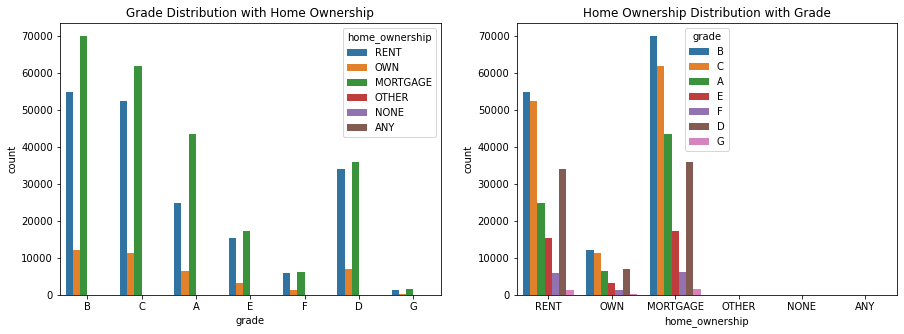

In [32]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=loan_data, x='grade', hue="home_ownership", ax=ax[0]).set_title("Grade Distribution with Home Ownership")
sns.countplot(data=loan_data, x='home_ownership', hue='grade', ax=ax[1]).set_title("Home Ownership Distribution with Grade")

Text(0.5, 1.0, 'Term Distribution')

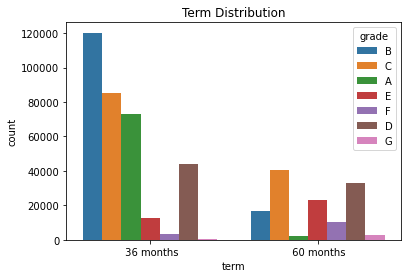

In [33]:
sns.countplot(data=loan_data, x="term", hue="grade").set_title("Term Distribution")

**Kesimpulan**:
1. Mortgage selalu mendominasi dalam melakukan peminjaman untuk setiap grade, diikuti oleh Rent dan Own
2. Grade B merupakan tingkat peminjaman terbanyak
3. Sebagian besar peminjam melakukan pembayaran dalam kurun waktu 36 bulan

Text(0.5, 1.0, 'Loan amounts grouped by purpose')

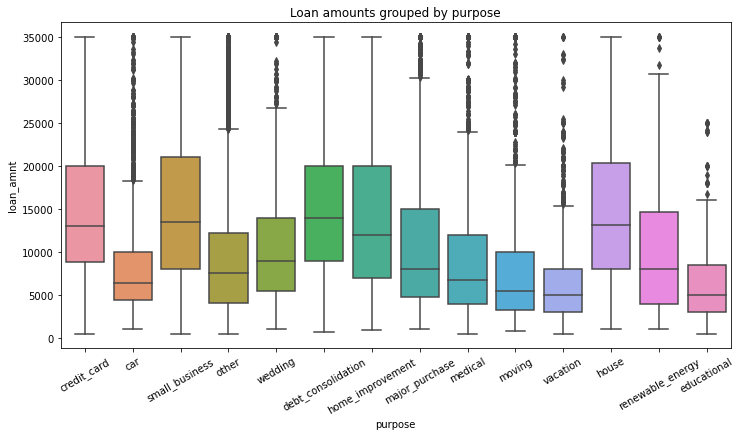

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x='purpose', y='loan_amnt', data=loan_data)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

**Kesimpulan**:
Pinjaman tertinggi berdasarkan tujuannya adalah Credit Card, Small Business, Debt Consolidation, Home Improvement, dan House.

In [35]:
loan_data["loan_status"].unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Loan_status Distribution with grade')

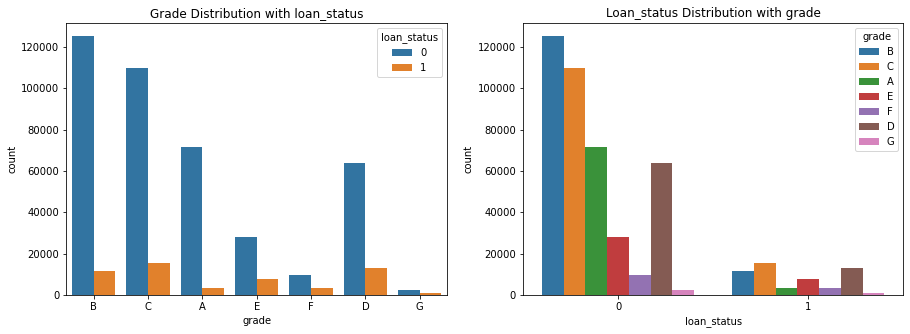

In [36]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=loan_data, x='grade', hue='loan_status', ax=ax[0]).set_title("Grade Distribution with loan_status")
sns.countplot(data=loan_data, x='loan_status', hue='grade', ax=ax[1]).set_title("Loan_status Distribution with grade")

**Kesimpulan**:
1. Peminjam dengan Grade B memiliki status loan: 0 terbanyak
2. Peminjam dengan Grade C memiliki status loan: 1 terbanyak
3. Sebagian besar peminjam memiliki status loan: 0

<AxesSubplot:>

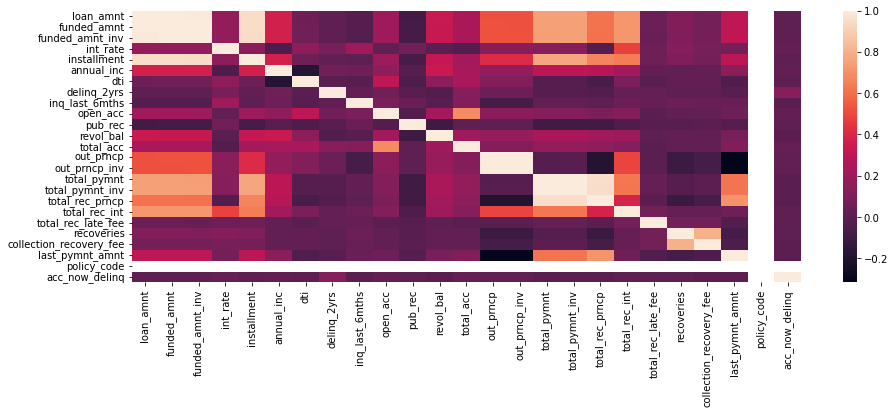

In [37]:
plt.figure(figsize=(15,5))
sns.heatmap(preprocessed_loan[preprocessed_num_cols].corr())

**Kesimpulan**:
1. Variabel loan_amnt berkorelasi tinggi dengan out_prncp
2. Total payment sangat berkorelasi tinggi dengan loan_amnt, funded_amnt, installment, total_rec_prncp

### Model Building

In [38]:
y = preprocessed_loan.pop("target")
X = preprocessed_loan[['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'sub_grade', 'home_ownership', 
                       'annual_inc', 'dti', 'out_prncp']]

X.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,dti,out_prncp
id,,,,,,,,,,
1077501,5000,5000,36,10.65,162.87,9,1,24000.0,27.65,0.0
1077430,2500,2500,60,15.27,59.83,18,1,30000.0,1.00,0.0
1077175,2400,2400,36,15.96,84.33,19,1,12252.0,8.72,0.0
1076863,10000,10000,36,13.49,339.31,15,1,49200.0,20.00,0.0
1075358,3000,3000,60,12.69,67.79,12,1,80000.0,17.94,766.9


In [39]:
X.shape

(466256, 10)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

max_score = 0
max_k = 0
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score = accuracy_score(y_test, knn.predict(X_test))
    print(f"number of k: {k}\t|\t accuracy: {score}")
    if score > max_score:
        max_k = k
        max_score = score

number of k: 1	|	 accuracy: 0.8165316671075302
number of k: 2	|	 accuracy: 0.8723592870879415
number of k: 3	|	 accuracy: 0.8558161813593371
number of k: 4	|	 accuracy: 0.875512057021526
number of k: 5	|	 accuracy: 0.8677909877964212
number of k: 6	|	 accuracy: 0.8775066665713448
number of k: 7	|	 accuracy: 0.8731599905631376
number of k: 8	|	 accuracy: 0.8790437312781945
number of k: 9	|	 accuracy: 0.8764986380891784
number of k: 10	|	 accuracy: 0.8797228994044768
number of k: 11	|	 accuracy: 0.8778212286508862
number of k: 12	|	 accuracy: 0.8803162778727024
number of k: 13	|	 accuracy: 0.8790866261072228
number of k: 14	|	 accuracy: 0.8808024192683572
number of k: 15	|	 accuracy: 0.8797014519899626
number of k: 16	|	 accuracy: 0.8806951821957864
number of k: 17	|	 accuracy: 0.8800589088985323
number of k: 18	|	 accuracy: 0.8809954459989848
number of k: 19	|	 accuracy: 0.8802876813200169
number of k: 20	|	 accuracy: 0.8811098322097272
number of k: 21	|	 accuracy: 0.8806093925377296
nu

In [42]:
print(f"Max Accuracy: {max_score} (k={max_k})")

Max Accuracy: 0.8822608434553214 (k=82)
